### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('E:\\cipherbyte\\Spam Email Detection - spam.csv')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Prepocessing

In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

<AxesSubplot:>

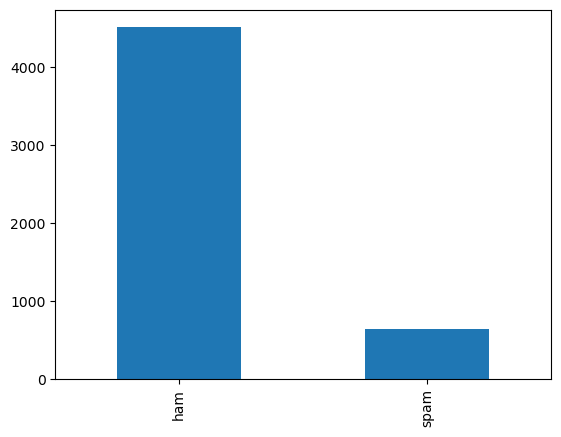

In [10]:
df['v1'].value_counts().plot.bar()

In [13]:
pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install wordcloud


In [15]:
from wordcloud import WordCloud


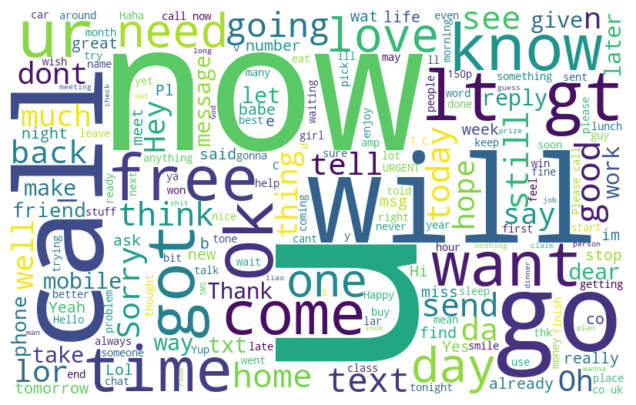

In [16]:

text=' '.join(df['v2'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df.head()

,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Finding duplicates
df.duplicated().sum()

409

In [15]:
df = df.drop_duplicates(keep = 'first')


In [16]:
#Splitting the data
X =  df["Mail Message"]
y =df["Spam or Ham"]

In [17]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [18]:
# Convert the text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Fitting multinomial naive bayes 

In [19]:

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [20]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [21]:
mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred

array(['ham'], dtype='<U4')

### finding accuracy of the training dataset


In [22]:
model.score(X_train_count,y_train)

0.9929782082324455

### finding accuracy of the test dataset


In [23]:
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9864472410454985